In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amazon.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [3]:
# Başlıkları Türkçeleştirme
df.columns = [
    'urun_id',           # Product ID
    'urun_ismi',         # Name of the Product
    'kategori',          # Category of the Product
    'indirimli_fiyat',   # Discounted Price of the Product
    'asil_fiyat',        # Actual Price of the Product
    'indirim_yuzdesi',   # Percentage of Discount for the Product
    'derecelendirme',    # Rating of the Product
    'derecelendirme_sayisi',  # Number of people who voted for the Amazon rating
    'urun_bilgisi',      # Description about the Product
    'kullanici_id',      # ID of the user who wrote review for the Product
    'kullanici_adi',     # Name of the user who wrote review for the Product
    'inceleme_id',       # ID of the user review
    'inceleme_basligi',  # Short review
    'inceleme_icerigi',  # Long review
    'resim_baglanti',    # Image Link of the Product
    'urun_baglanti'      # Official Website Link of the Product
]

df.to_csv("amazon_turkce.csv", index=False)

In [4]:
df = pd.read_csv("amazon_turkce.csv")
df_copy= df.copy()
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   urun_id                1465 non-null   object
 1   urun_ismi              1465 non-null   object
 2   kategori               1465 non-null   object
 3   indirimli_fiyat        1465 non-null   object
 4   asil_fiyat             1465 non-null   object
 5   indirim_yuzdesi        1465 non-null   object
 6   derecelendirme         1465 non-null   object
 7   derecelendirme_sayisi  1463 non-null   object
 8   urun_bilgisi           1465 non-null   object
 9   kullanici_id           1465 non-null   object
 10  kullanici_adi          1465 non-null   object
 11  inceleme_id            1465 non-null   object
 12  inceleme_basligi       1465 non-null   object
 13  inceleme_icerigi       1465 non-null   object
 14  resim_baglanti         1465 non-null   object
 15  urun_baglanti        

Sütunlardaki NaN değer sayıları:urun_id                  0
urun_ismi                0
kategori                 0
indirimli_fiyat          0
asil_fiyat               0
indirim_yuzdesi          0
derecelendirme           0
derecelendirme_sayisi    2
urun_bilgisi             0
kullanici_id             0
kullanici_adi            0
inceleme_id              0
inceleme_basligi         0
inceleme_icerigi         0
resim_baglanti           0
urun_baglanti            0
dtype: int64


C:\Users\erena\AppData\Local\Temp\ipykernel_24316\3467370413.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nan_counts.index, y=nan_counts.values, palette='viridis')


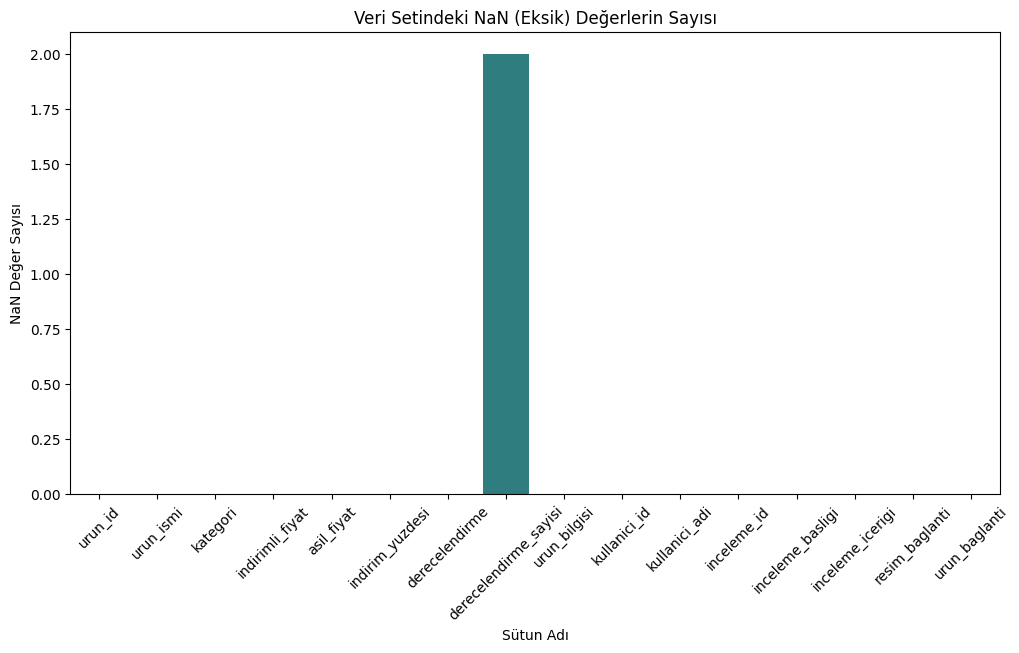

In [5]:
nan_counts = df_copy.isna().sum()
print("Sütunlardaki NaN değer sayıları:{}".format(nan_counts))
# NaN değerlerinin görselleştirilmesi
plt.figure(figsize=(12, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values, palette='viridis')
plt.xlabel('Sütun Adı')
plt.ylabel('NaN Değer Sayısı')
plt.title('Veri Setindeki NaN (Eksik) Değerlerin Sayısı')
plt.xticks(rotation=45)
plt.show()

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   urun_id                1465 non-null   object
 1   urun_ismi              1465 non-null   object
 2   kategori               1465 non-null   object
 3   indirimli_fiyat        1465 non-null   object
 4   asil_fiyat             1465 non-null   object
 5   indirim_yuzdesi        1465 non-null   object
 6   derecelendirme         1465 non-null   object
 7   derecelendirme_sayisi  1463 non-null   object
 8   urun_bilgisi           1465 non-null   object
 9   kullanici_id           1465 non-null   object
 10  kullanici_adi          1465 non-null   object
 11  inceleme_id            1465 non-null   object
 12  inceleme_basligi       1465 non-null   object
 13  inceleme_icerigi       1465 non-null   object
 14  resim_baglanti         1465 non-null   object
 15  urun_baglanti        

In [7]:
# ₹ işaretini kaldırma ve sayısal formata çevirme
df_copy['indirimli_fiyat'] = df_copy['indirimli_fiyat'].replace({'₹': ''}, regex=True)
df_copy['asil_fiyat'] = df_copy['asil_fiyat'].replace({'₹': ''}, regex=True)

# Sayısal formata dönüştürme
df_copy['indirimli_fiyat'] = pd.to_numeric(df_copy['indirimli_fiyat'], errors='coerce')
df_copy['asil_fiyat'] = pd.to_numeric(df_copy['asil_fiyat'], errors='coerce')

# Hatalı veya eksik veri olan satırları temizleme
df_copy = df_copy.dropna(subset=['indirim_yuzdesi', 'asil_fiyat', 'indirimli_fiyat']) 

# 'indirim_yuzdesi' sütununu sayısal formata çevirme
df_copy['indirim_yuzdesi'] = df_copy['indirim_yuzdesi'].replace({'%': ''}, regex=True)  # Yüzde işaretini kaldır
df_copy['indirim_yuzdesi'] = pd.to_numeric(df_copy['indirim_yuzdesi'], errors='coerce')  # Sayısal formata çevir

# 'derecelendirme' sütununu sayısal formata çevirme
df_copy['derecelendirme'] = pd.to_numeric(df_copy['derecelendirme'], errors='coerce')  # Sayısal formata çevir

# 'derecelendirme_sayisi' sütununu sayısal formata çevirme
df_copy['derecelendirme_sayisi'] = df_copy['derecelendirme_sayisi'].replace({',': ''}, regex=True)  # Virgülleri kaldır
df_copy['derecelendirme_sayisi'] = pd.to_numeric(df_copy['derecelendirme_sayisi'], errors='coerce')  # Sayısal formata çevir
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 1 to 1460
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   urun_id                531 non-null    object 
 1   urun_ismi              531 non-null    object 
 2   kategori               531 non-null    object 
 3   indirimli_fiyat        531 non-null    float64
 4   asil_fiyat             531 non-null    float64
 5   indirim_yuzdesi        531 non-null    int64  
 6   derecelendirme         531 non-null    float64
 7   derecelendirme_sayisi  529 non-null    float64
 8   urun_bilgisi           531 non-null    object 
 9   kullanici_id           531 non-null    object 
 10  kullanici_adi          531 non-null    object 
 11  inceleme_id            531 non-null    object 
 12  inceleme_basligi       531 non-null    object 
 13  inceleme_icerigi       531 non-null    object 
 14  resim_baglanti         531 non-null    object 
 15  urun_bagla

In [8]:
df_copy

,urun_id,urun_ismi,kategori,indirimli_fiyat,asil_fiyat,indirim_yuzdesi,derecelendirme,derecelendirme_sayisi,urun_bilgisi,kullanici_id,kullanici_adi,inceleme_id,inceleme_basligi,inceleme_icerigi,resim_baglanti,urun_baglanti
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,65,4.1,15188.0,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/boAt-Micro-USB-Tangle-Fr...
7,B08DDRGWTJ,MI Usb Type-C Cable Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,229.00,299.0,23,4.3,30411.0,1m long Type-C USB Cable|Sturdy and Durable. W...,"AHW6E5LQ2BDYOIVLAJGDH45J5V5Q,AF74RSGCHPZITVFSZ...","Pavan A H,Jayesh bagad,Shridhar,rajendran,karu...","R2X090D1YHACKR,R32ZCIH9AFNJ60,R3N57EVVG0EHAF,R...","Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,https://m.media-amazon.com/images/I/31XO-wfGGG...,https://www.amazon.in/MI-MTCY001IN-USB-Type-C-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,B09LMMFW3S,"IKEA Milk Frother for Your Milk, Coffee,(Cold ...","Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",229.00,399.0,43,3.6,451.0,Frothes milk up in 15-20 seconds.|Can be used ...,"AE4755NP2P2WIA3W6UZ4GBQUMYJQ,AGWJM4UXHNXL35HZ2...","ANURAG,Amazon Customer,Pallavi Jaiswal,Anshita...","R1K0ML8QPZZSH7,R1VJZH5L1SRLPA,R2TTZ6Y61C1955,R...","Rechargable batteries do not fit correctly,Oka...",While it makes enough froth under 1.5mins (tes...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/IKEA-Frother-Coffee-Drin...
1449,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,199.00,699.0,72,2.9,159.0,Faucet Water Filter: Built-in layered filter c...,"AF6LRVDRKYWPTZXZLQERZ3LXCWDA,AG7FU75LA5ONPMNEV...","Anmol Khanna,G.l.sudhakar,Amazon Customer,mano...","R9GL8284FSYUG,R1Q6Z3DZDJMDPN,R25CLTZM7X33KC,R3...","Stop working after few days,Ok. Changing every...","Stop working

ASIL FİYAT VE İNDİRİMLİ FİYAT ARASINDAKİ FARKIN EN BÜYÜK OLDUĞU ÜRÜNLERİ GETİRİR.

In [9]:
# Fiyat farkını hesaplama
df_copy['fiyat_farki'] = df_copy['asil_fiyat'] - df_copy['indirimli_fiyat']

# Aynı ürün adına sahip ürünler için fiyat farkı en büyük olanını seçme
df_copy_unique_urunler = (
    df_copy.loc[df_copy.groupby('urun_ismi')['fiyat_farki'].idxmax()]
    .sort_values(by='fiyat_farki', ascending=False)
)

# İlgili sütunları seçerek, fiyat farkı en büyük olan ilk 10 ürünü yazdırma
sonuc = df_copy_unique_urunler[['urun_ismi', 'asil_fiyat', 'indirimli_fiyat', 'fiyat_farki', 'derecelendirme', 'derecelendirme_sayisi']].head(10)

# Sonuçları yazdır
print(sonuc)


                                             urun_ismi  asil_fiyat  \
920  Silicone Rubber Earbuds Tips, Eartips, Earpads...       999.0   
407  Sounce Spiral Charger Cable Protector Data Cab...       999.0   
602  LAPSTER Spiral Charger Spiral Charger Cable Pr...       999.0   
557  LAPSTER 12pcs Spiral Cable Protectors for Char...       999.0   
870  LS LAPSTER Quality Assured Universal Silicone ...       999.0   
552  Sounce Gold Plated 3.5 mm Headphone Splitter f...       999.0   
653  STRIFF Mpad Mouse Mat 230X190X3mm Gaming Mouse...       999.0   
62   Lapster 1.5 mtr USB 2.0 Type A Male to USB A M...       999.0   
841  LAPSTER Accessories Power Cable Cord 2 Pin Lap...       999.0   
118  Lapster 5 pin mini usb cable, usb b cable,came...       999.0   

     indirimli_fiyat  fiyat_farki  derecelendirme  derecelendirme_sayisi  
920             99.0        900.0             3.8                  594.0  
407             99.0        900.0             4.0                 1396.0  
602 

C:\Users\erena\AppData\Local\Temp\ipykernel_24316\2254683486.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\erena\AppData\Local\Temp\ipykernel_24316\2254683486.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


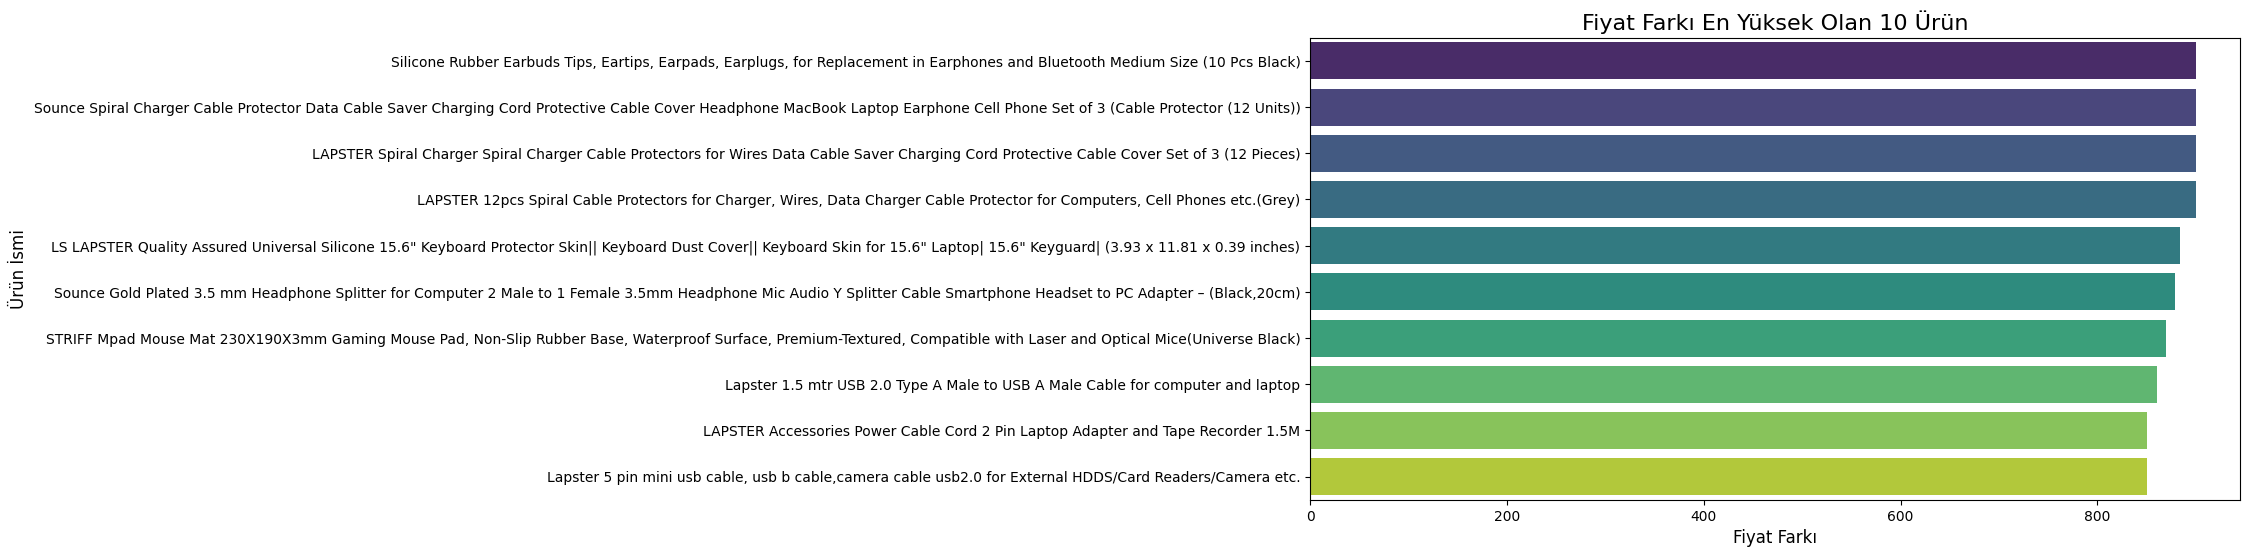

In [10]:
# Fiyat farkı en yüksek olan ilk 10 ürünü seç
top_10_products = df_copy_unique_urunler[['urun_ismi', 'fiyat_farki']].head(10)

# Grafik boyutunu ayarla
plt.figure(figsize=(12, 6))

# Barplot ile fiyat farkını görselleştir
sns.barplot(
    data=top_10_products,
    x='fiyat_farki',
    y='urun_ismi',
    palette='viridis'
)

# Başlık ve etiketleri ekle
plt.title('Fiyat Farkı En Yüksek Olan 10 Ürün', fontsize=16)
plt.xlabel('Fiyat Farkı', fontsize=12)
plt.ylabel('Ürün İsmi', fontsize=12)

# Grafiği göster
plt.tight_layout()
plt.show()

Fiyat Farkı aralıkları
0-100TL , 100-500TL , 500TL üzeri

In [11]:
# Fiyat aralıklarını tanımlama (Örnek aralıklar: 0-100, 100-500, 500+)
bins = [0, 100, 500, float('inf')]  # 0-100, 100-500, 500+
labels = ['0-100 TL', '100-500 TL', '500+ TL']

# İndirimli fiyatları bu aralıklara ayıralım
df_copy['fiyat_araligi'] = pd.cut(df_copy['indirimli_fiyat'], bins=bins, labels=labels, right=False)

# Her aralık için ortalama derecelendirme ve derecelendirme sayısını hesaplayalım
fiyat_araligi_performans = df_copy.groupby('fiyat_araligi').agg(
    ortalama_derecelendirme=('derecelendirme', 'mean'),
    ortalama_derecelendirme_sayisi=('derecelendirme_sayisi', 'mean')
).reset_index()

# Sonuçları yazdıralım
print(fiyat_araligi_performans)

  fiyat_araligi  ortalama_derecelendirme  ortalama_derecelendirme_sayisi
0      0-100 TL                 4.072093                     7490.953488
1    100-500 TL                 4.076334                    18388.426573
2       500+ TL                 4.140351                    25190.315789


C:\Users\erena\AppData\Local\Temp\ipykernel_24316\1838447089.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fiyat_araligi_performans = df_copy.groupby('fiyat_araligi').agg(


  fiyat_araligi  ortalama_derecelendirme  ortalama_derecelendirme_sayisi
0         0-100                 4.060000                     5531.800000
1       101-200                 4.251852                     7188.148148
2       201-500                 4.046961                    13774.635359
3      501-1000                 4.089776                    22199.315113


C:\Users\erena\AppData\Local\Temp\ipykernel_24316\772465790.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fiyat_derecelendirme_analizi = df_copy.groupby('fiyat_araligi').agg(


<Figure size 1000x600 with 0 Axes>

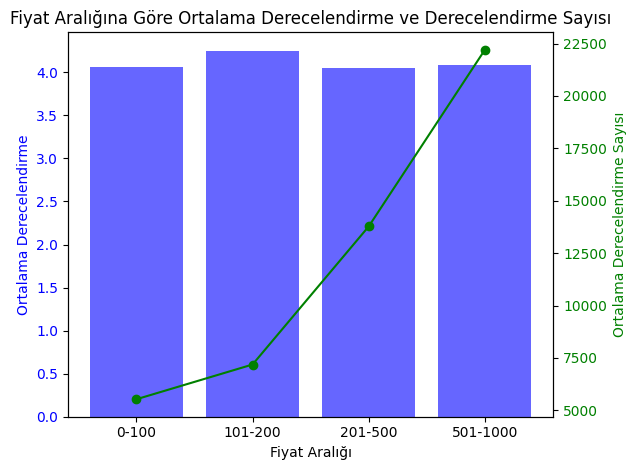

In [12]:
# Fiyat aralıklarını belirlemek için 'asil_fiyat'ı belirli aralıklara bölelim
bins = [0, 100, 200, 500, 1000]  # Fiyat aralıkları
labels = ['0-100', '101-200', '201-500', '501-1000']
df_copy['fiyat_araligi'] = pd.cut(df_copy['asil_fiyat'], bins=bins, labels=labels, right=False)

# Her fiyat aralığındaki ortalama derecelendirme ve ortalama derecelendirme sayısını hesaplayalım
fiyat_derecelendirme_analizi = df_copy.groupby('fiyat_araligi').agg(
    ortalama_derecelendirme=('derecelendirme', 'mean'),
    ortalama_derecelendirme_sayisi=('derecelendirme_sayisi', 'mean')
).reset_index()

# Tabloyu yazdıralım
print(fiyat_derecelendirme_analizi)

# Grafiği çizelim
plt.figure(figsize=(10, 6))
fig, ax1 = plt.subplots()

# Bar grafiği çizelim (ortalama derecelendirme)
ax1.bar(fiyat_derecelendirme_analizi['fiyat_araligi'], fiyat_derecelendirme_analizi['ortalama_derecelendirme'], color='blue', alpha=0.6, label='Ortalama Derecelendirme')

# Y eksenini ayarlayalım
ax1.set_xlabel('Fiyat Aralığı')
ax1.set_ylabel('Ortalama Derecelendirme', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# İkinci Y eksenini ekleyelim (ortalama derecelendirme sayısı)
ax2 = ax1.twinx()
ax2.plot(fiyat_derecelendirme_analizi['fiyat_araligi'], fiyat_derecelendirme_analizi['ortalama_derecelendirme_sayisi'], color='green', marker='o', label='Ortalama Derecelendirme Sayısı')

# İkinci Y eksenini ayarlayalım
ax2.set_ylabel('Ortalama Derecelendirme Sayısı', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Başlık ekleyelim
plt.title('Fiyat Aralığına Göre Ortalama Derecelendirme ve Derecelendirme Sayısı')

# Grafikleri gösterelim
fig.tight_layout()
plt.show()

Kullanıcı bazlı hesaplamalar

In [13]:
# Kategorileri '|' ve '&' gibi ayırıcılarla ayıralım
df_copy['kategori_listesi'] = df_copy['kategori'].str.split(r'[\|&]')

# Kategori listesindeki her bir kategori için satır oluşturmak
df_copy_expanded = df_copy.explode('kategori_listesi').reset_index(drop=True)

# Kategoriye göre fiyat farkı hesaplama
df_copy_expanded['fiyat_farki'] = df_copy_expanded['asil_fiyat'] - df_copy_expanded['indirimli_fiyat']

# Kategorilere göre fiyat farkı ve ortalama fiyat farkını hesaplayalım
kategori_fiyat_farki = df_copy_expanded.groupby('kategori_listesi')['fiyat_farki'].mean()

# Kategorilere göre derecelendirme sayısını hesaplayalım
kategori_derecelendirme_sayisi = df_copy_expanded.groupby('kategori_listesi')['derecelendirme_sayisi'].sum()

# Kategorilere göre fiyat farkı ve derecelendirme sayısını birleştirelim
kategori_analizi = pd.DataFrame({
    'ortalama_fiyat_farki': kategori_fiyat_farki,
    'toplam_derecelendirme_sayisi': kategori_derecelendirme_sayisi
}).reset_index()

# Toplam derecelendirme sayısına göre azalan sıralama yapalım
kategori_analizi_sorted = kategori_analizi.sort_values(by='toplam_derecelendirme_sayisi', ascending=False)

# Sonuçları yazdıralım
print(kategori_analizi_sorted.head(10))


       kategori_listesi  ortalama_fiyat_farki  toplam_derecelendirme_sayisi
0           Accessories            392.596031                    14980302.0
17               Cables            411.395622                     7050534.0
64          Electronics            379.977778                     4546511.0
37            Computers            388.468038                     4146387.0
165         Peripherals            393.473926                     3526420.0
209           USBCables            408.668765                     2747258.0
88   Headphones,Earbuds            431.600000                     2210001.0
87           Headphones            349.625000                     2181393.0
98               In-Ear            369.600000                     2167596.0
218               Video            394.254545                     1519798.0


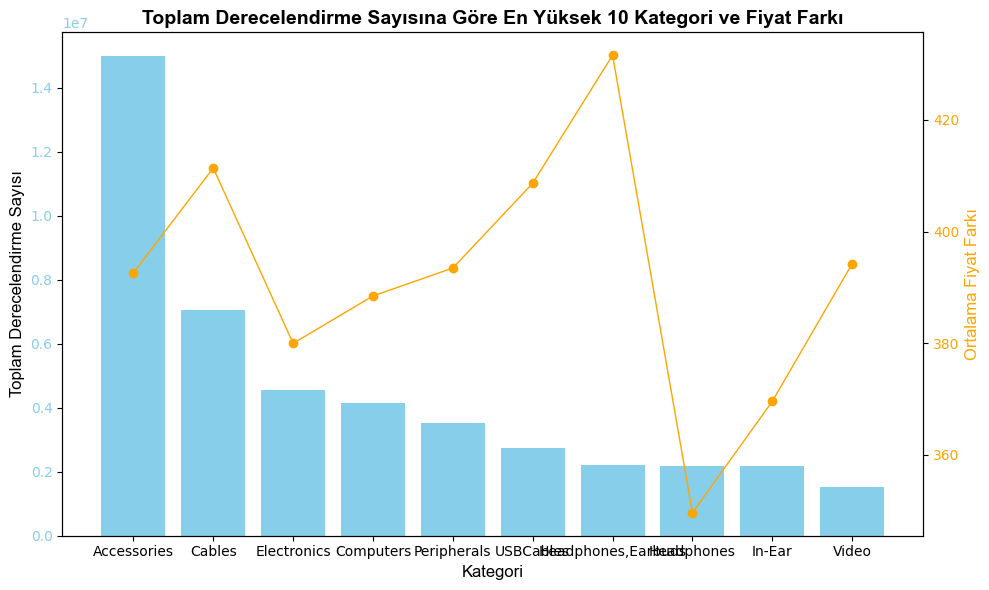

In [14]:
# Toplam derecelendirme sayısına göre en yüksek 10 kategori
en_yuksek_10_kategori = kategori_analizi_sorted.head(10)

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart oluşturuluyor (dikey)
ax.bar(en_yuksek_10_kategori['kategori_listesi'], en_yuksek_10_kategori['toplam_derecelendirme_sayisi'], color='skyblue', label='Toplam Derecelendirme Sayısı')

# Ortalaması fiyat farklarını çizgiyle eklemek
ax2 = ax.twinx()  # İkinci y ekseni
ax2.plot(en_yuksek_10_kategori['kategori_listesi'], en_yuksek_10_kategori['ortalama_fiyat_farki'], color='orange', marker='o', linestyle='-', linewidth=1, label='Ortalama Fiyat Farkı')

# Başlık ve etiketler
ax.set_title('Toplam Derecelendirme Sayısına Göre En Yüksek 10 Kategori ve Fiyat Farkı', fontsize=14, fontweight='bold', fontname='Arial')
ax.set_xlabel('Kategori', fontsize=12, fontname='Arial')
ax.set_ylabel('Toplam Derecelendirme Sayısı', fontsize=12, fontname='Arial')
ax2.set_ylabel('Ortalama Fiyat Farkı', fontsize=12, color='orange', fontname='Arial')

# Eksen etiketleri
ax.tick_params(axis='y', labelcolor='skyblue')
ax2.tick_params(axis='y', labelcolor='orange')


plt.xticks(rotation=45, ha='right', fontsize=10, fontname='Arial')
plt.tight_layout()
plt.show()